<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descriptive-Analysis" data-toc-modified-id="Descriptive-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descriptive Analysis</a></span><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objectives</a></span></li></ul></li><li><span><a href="#Sample-Data" data-toc-modified-id="Sample-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sample Data</a></span></li><li><span><a href="#Different-Statical-Measures" data-toc-modified-id="Different-Statical-Measures-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Different Statical Measures</a></span><ul class="toc-item"><li><span><a href="#Measures-of-Center" data-toc-modified-id="Measures-of-Center-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Measures of Center</a></span><ul class="toc-item"><li><span><a href="#Mathematical-Properties" data-toc-modified-id="Mathematical-Properties-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Mathematical Properties</a></span></li></ul></li><li><span><a href="#Measures-of-Spread" data-toc-modified-id="Measures-of-Spread-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Measures of Spread</a></span><ul class="toc-item"><li><span><a href="#Min,-Max,-and-Range" data-toc-modified-id="Min,-Max,-and-Range-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Min, Max, and Range</a></span></li><li><span><a href="#Percentiles-and-IQR" data-toc-modified-id="Percentiles-and-IQR-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Percentiles and IQR</a></span></li><li><span><a href="#Standard-Deviation" data-toc-modified-id="Standard-Deviation-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Standard Deviation</a></span></li></ul></li><li><span><a href="#Visual-Description" data-toc-modified-id="Visual-Description-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visual Description</a></span><ul class="toc-item"><li><span><a href="#Histograms" data-toc-modified-id="Histograms-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Box-and-Whisker-Plot" data-toc-modified-id="Box-and-Whisker-Plot-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Box and Whisker Plot</a></span></li></ul></li><li><span><a 

In [1]:
# import standard analytics and plotting libraries.
# scipy is a library for statistics and machine learning (fancy stats)
from scipy import stats

# Standard plotting or visualization library
from matplotlib import pyplot as plt

# Standard plotting or visualization library with nicer plotting effects.
import seaborn as sns

# standard analytics and computing library
import numpy as np

# this is a matplotlib function that sets the plotting style (set of parameters)
# for plotting like colors to use etc..
plt.style.use('fivethirtyeight')

# Descriptive Analysis 

When trying to understand your data, it is typically impossible to just look at raw data and get much insight. We need ways to turn a bunch of data into a smaller set of numbers that are easily digestible summaries of your data. This will make them understandable both for you and for the people you work with. We call these **descriptive statistics**.

## Objectives

- learn about measures of central tendency 
- learn about measures of dispersion (aka spread)
- use some charts to summarize our data and explore these measures.

# Sample Data

Let's build a simple dataset, based on a hypothetical survey of the number of pairs of shoes owned by 11 random people:

In [41]:
# Assign the numpy array to the 'data' variable.
data = np.array([5, 6, 3, 4, 3, 4, 8, 8, 1, 8, 2])                     
data

array([5, 6, 3, 4, 3, 4, 8, 8, 1, 8, 2])

In [38]:
mean = np.mean(data)
mean

18.75

In [6]:
mean = np.sum(data)/len(data)
mean

4.7272727272727275

# Different Statistical Measures 📊

## Measures of Center (Central Tendency)

One natural place to begin is to ask about where the **middle** of the data is. In other words, what is the value that is closest to our other values? 

There are three common measures used to describe the "middle":

- **Mean (arithmetic mean)**: The sum of values / number of values
- **Median**: The value with as many values above it as below it
    - If the dataset has an even number of values, the median is the mean of the two middle numbers.
- **Mode**: The most frequent value(s)
    - A dataset can have multiple modes if multiple values are tied for the most frequent. (multi-modal)

Let's see what we have for our example:

In [9]:
print(f"Mean: {np.mean(data)}")
print(f"Median: {np.median(data)}")
print(f"Mode: {stats.mode(data)[0][0]}")

Mean: 4.7272727272727275
Median: 4.0
Mode: 8


In [18]:
## You can also find the mode(s) using np.unique()
counts = np.unique(data, return_counts=True)
counts

# The second item printed in this array is the counts of the specific values in our data set.

(array([1, 2, 3, 4, 5, 6, 8]), array([1, 1, 2, 2, 1, 1, 3]))

**Discussion**: If somebody asked you "How many pairs of shoes do people usually have?", how would you answer (based on these data)?

## Measures of Spread

Another natural question is about the **spread** of the data or the **dispersion**. In other words, how wide a range of values do you have? And how close or far are they from the "middle"?

### Min, Max, and Range

The minimum and maximum values of a dataset tell you the full extent of the values of your dataset. The range of the dataset is the difference between those two values.

In [23]:
data

array([5, 6, 3, 4, 3, 4, 8, 8, 1, 8, 2])

In [22]:
print(f"Min: {data.min()}")
print(f"Max: {data.max()}")
print(f"Range: {data.max() - data.min()}")

Min: 1
Max: 8
Range: 7


### Percentiles and IQR

You can also calculate values at various **percentiles** to understand the spread. An "Nth Percentile" value is the value that is greater than N% of other values. The 25th and 75th percentiles are commonly used to describe spread, and the **interquartile range (IQR)** is the difference between these two values.

See [the docs](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) for more specifics about how percentiles are calculated, which is surprisingly tricky.

In [24]:
print(f"25th Percentile: {np.percentile(data, 25)}")
print(f"75th Percentile: {np.percentile(data, 75)}")
print(f"IQR: {np.percentile(data, 75) - np.percentile(data, 25)}")

25th Percentile: 3.0
75th Percentile: 7.0
IQR: 4.0


In [26]:
# to calculate percentiles:in this case divide the equally into 4 parts:
# the first quarter : 25th percentile,
# the second quarter: 50th percentile aka median
# the third quarter:  75th percentile
# the fourth quarter: 100th percentile
sorted_data = sorted(data)
sorted_data

[1, 2, 3, 3, 4, 4, 5, 6, 8, 8, 8]

### Standard Deviation

The **standard deviation** is in effect the distance from the mean of the "average" data point. It is defined as: $$\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$$


In [29]:
np.sqrt(-25.0 * (-25.0))

25.0

x with a bar on top : is the mean or average

$x_{i}$:  is the element at the i position in the data set


step 1: subtract the average value from every data point.
step 2: we square or take that value to the second power. (multiply that number times itself)

step3: we add all those numbers up

step4: we divide by n, the number of items in the dataset or collection

step 5: we take the square root (weird looking check symbol)

In [30]:
print(f"Standard Deviation: {data.std()}")

Standard Deviation: 2.3775812419312765


# Visual Description

A picture is worth a thousand words - or numbers! Here we will show how to use histograms and box-and-whisker plots to describe your data.

## Histograms

One natural way of starting to understand a dataset is to construct a **histogram**, which is a bar chart showing the counts of the different values in the dataset.

There will usually be many distinct values in your dataset, and you will need to decide how many **bins** to use in the histogram. The bins define the ranges of values captured in each bar in your chart. 

Text(0, 0.5, 'count [#]')

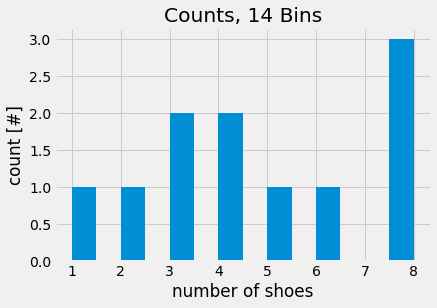

In [43]:
fig, ax = plt.subplots()
ax.hist(data, bins=14)
plt.title('Counts, 14 Bins')
plt.xlabel('number of shoes')
plt.ylabel('count [#]')

Text(0.5, 1.0, 'Counts, 10 Bins')

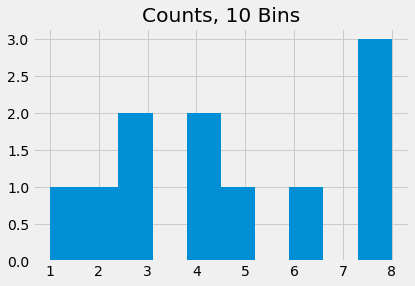

In [33]:
fig, ax = plt.subplots()
ax.hist(data, bins=10)
plt.title('Counts, 10 Bins')

Text(0.5, 1.0, 'Counts, 5 Bins')

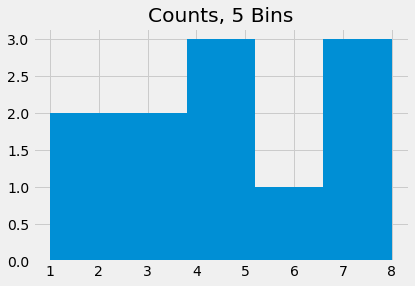

In [34]:
fig, ax = plt.subplots()
ax.hist(data, bins=5)
plt.title('Counts, 5 Bins')

Text(0.5, 1.0, 'Counts, 7 Bins')

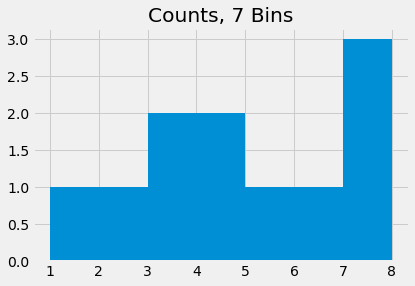

In [35]:
fig, ax = plt.subplots()
ax.hist(data, bins=7)
plt.title('Counts, 7 Bins')

## Box and Whisker Plot

A box-and-whisker plot can also be useful for visually summarizing your data by showing the min, IQR, and max.

Text(0.5, 1.0, 'Counts of Pairs of Shoes')

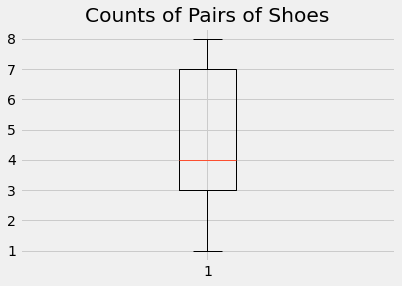

In [36]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.title('Counts of Pairs of Shoes')

In [46]:
import numpy as np

np.sum(data)

52